In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-05-04 23:55:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   123KB/s    in 0.3s    

2020-05-04 23:55:33 (123 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [3]:
df = pd.read_csv("teleCust1000t.csv")
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [5]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [6]:
df["age"].value_counts()

33    39
39    35
35    34
34    32
31    32
37    31
40    28
42    28
30    26
52    25
36    25
45    24
46    24
27    24
43    24
48    24
54    24
41    24
50    23
25    23
51    23
28    22
38    21
32    21
26    21
47    21
55    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
60    11
61    11
20    10
64    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
77     1
71     1
72     1
73     1
74     1
18     1
Name: age, dtype: int64

In [8]:
df["marital"].value_counts()

0    505
1    495
Name: marital, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76fc9c0a58>]],
      dtype=object)

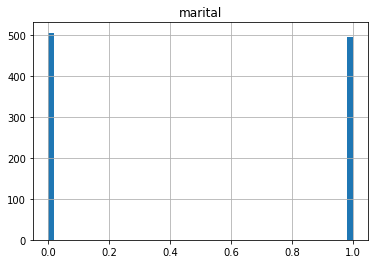

In [9]:
df.hist(column = 'marital',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76fc08f588>]],
      dtype=object)

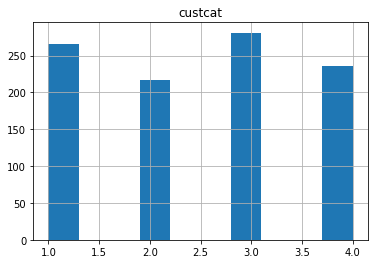

In [13]:
df.hist(column = 'custcat' , bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76fc009940>]],
      dtype=object)

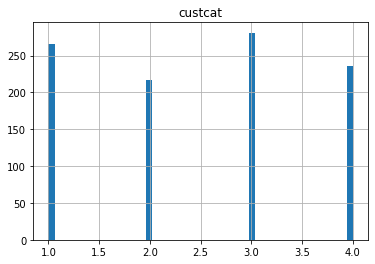

In [14]:
df.hist(column = 'custcat',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76fbefb7b8>]],
      dtype=object)

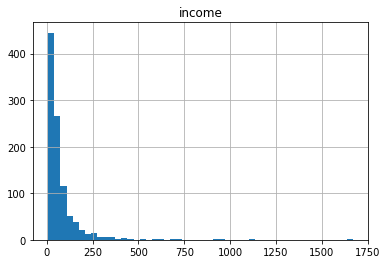

In [15]:
df.hist(column="income",bins=50)

In [16]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
#for using the scikit learn we have to convert the pandas data frame into numpy array
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [20]:
y=df["custcat"].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

In [22]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -0.54919639,  0.49746728, -0.22207644,  0.96655883,
        -0.927

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [37]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([3, 3, 3, 4, 4, 3, 3, 4, 2, 4])

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [43]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros(Ks-1)
ConfusionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    print(mean_acc)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print(std_acc)

print("Acuracy actual is")
print(mean_acc)
print(std_acc)
    

[0.3 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.0324037 0.        0.        0.        0.        0.        0.
 0.        0.       ]
[0.3  0.29 0.   0.   0.   0.   0.   0.   0.  ]
[0.0324037  0.03208582 0.         0.         0.         0.
 0.         0.         0.        ]
[0.3   0.29  0.315 0.    0.    0.    0.    0.    0.   ]
[0.0324037  0.03208582 0.03284623 0.         0.         0.
 0.         0.         0.        ]
[0.3   0.29  0.315 0.32  0.    0.    0.    0.    0.   ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.         0.
 0.         0.         0.        ]
[0.3   0.29  0.315 0.32  0.315 0.    0.    0.    0.   ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.
 0.         0.         0.        ]
[0.3   0.29  0.315 0.32  0.315 0.31  0.    0.    0.   ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.         0.         0.        ]
[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.    0.   ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.0

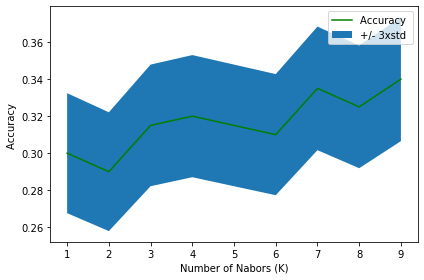

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
